<a href="https://colab.research.google.com/github/vkusnezh/Projects-Portfolio/blob/main/Fake_news_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this project is to create a sand-box to play with building a models to classify a news as REAL or FAKE.

# Fake news definition

Fake news - False information that is broadcast or published as news for fraudulent or politically motivated purposes [2].

Fake news was named the word of the year in 2017 by the Collins Dictionary. In 2017, the usage of the term had increased by 365% since 2016 (Collins Dictionary, 2017) [3], fig.1.1. 

Examples from Defining “Fake News” article [4].
On December 4, 2016, a man carrying an assault rifle walked into a pizza restaurant in Washington, DC. He was intent on “self-investigating” whether the restaurant,
Comet Ping Pong, was the headquarters of an underground child sex ring allegedly run
by then presidential candidate Hillary Clinton and her former campaign manager, John
Podesta (Lopez 2016). He was motivated by stories he had read on right-wing blogs
and social media that had developed this line of thought. In the process of his
“self-investigation,” he fired several shots into the ceiling of the restaurant. No one was
injured, but it was just one of the several threats made to the pizzeria after the news
report spread through social media sites, such as Facebook, Reddit, and Twitter (Lopez
2016). The viral news report, however, was a hoax. The District of Columbia’s Metropolitan Police Department also officially declared it as a “fictitious conspiracy theory”
(Ritchie 2016).
Pizzagate, as the conspiracy theory was later called, is just one of the numerous
fake news stories that flood social media (Ritchie 2016; Silverman 2016). From Pope
Francis endorsing then Republican presidential candidate Donald Trump, to a woman
arrested for defecating on her boss’ desk after she won the lottery, fake news stories
have engaged—and fooled—millions of readers around the world (Silverman 2016). A
2016 survey commissioned by news and entertainment site BuzzFeed found that “fake
news headlines fool American adults about 75% of the time” (Silverman and
Singer-Vine 2016, para. 1). In many cases, readers ignore the fake news stories they
come across, but in some cases the consumption of fake news leads to concrete
actions. For example, at the ministerial level, Pakistan’s defense minister tweeted on
December 23, 2016 a menacing response to a false report that Israel had threatened Pakistan with nuclear weapons (Goldman 2016). World leaders, such as former US President Barack Obama and Pope Francis, the leader of the Roman Catholic church, have
expressed concern over the spread of fake news (Gardiner and Eddy 2016; Pullella
2016). Studies have also started to look at the implications of fake news, not only in
terms of confusing readers (Barthel, Mitchell, and Holcomb 2016) but even in potentially affecting election results (Allcott and Gentzkow 2017).
The term “fake news” is not new. Contemporary discourse, particularly media coverage, seems to define fake news as referring to viral posts based on fictitious accounts
made to look like news reports. A recent study defined fake news “to be news articles
that are intentionally and verifiably false, and could mislead readers” (Allcott and Gentzkow 2017, 213). Two main motivations underlie the production of fake news: financial
and ideological. On one hand, outrageous and fake stories that go viral—precisely
because they are outrageous—provide content producers with clicks that are convertible to advertising revenue. On the other hand, other fake news providers produce fake
news to promote particular ideas or people that they favor, often by discrediting others
(Allcott and Gentzkow 2017). Fake news has now become a buzzword, but current references to it seem to define it differently from earlier definitions. Earlier studies have
applied the term to define related but distinct types of content, such as news parodies,
political satires, and news propaganda. While it is currently used to describe false stories spreading on social media, fake news has also been invoked to discredit some
news organizations’ critical reporting, further muddying discourse around fake news.

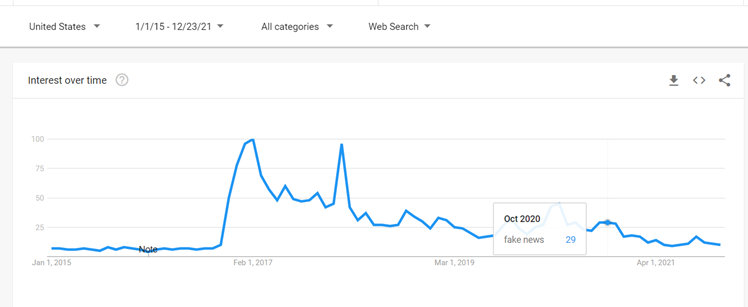

Fig. 1.1. Fake news in Google trends

# Project

In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# New Section

In [ ]:
#Read the data from google drive
url='https://drive.google.com/file/d/1g1DS0TbDYWKVORIbC3XJJ6Do73KrkQ9b/view?usp=sharing'
url_c='https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df=pd.read_csv(url_c)

#Get head

#df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#DataFlair - get the labels from the DataFrame
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
#Split the dataset into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.3, random_state=10)

Initialization of a TfidfVectorizer with stop words from the English language and a maximum document frequency of 0.7 (terms with a higher document frequency will be discarded). 
TfidfVectorizer turns a collection of raw documents into a matrix of TF-IDF features.

Fiting and transformation of the vectorizer on the train set, and transformation of the vectorizer on the test set.

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

Initialization of a PassiveAggressiveClassifier, and fit it on tfidf_train and y_train.

Then, we’ll predict on the test set from the TfidfVectorizer and calculate the accuracy with accuracy_score() from sklearn.metrics.

In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=30)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,3)}%')

Accuracy: 94.214%


Accuracy is 94.2% with this model. Finally, let’s print out a confusion matrix to gain insight into the number of false and true negatives and positives.

In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[874,  46],
       [ 64, 917]])

So with this model, we have 874 true positives, 917 true negatives, 46 false positives, and 64 false negatives.

# Conclusions

# References



1.   https://data-flair.training/blogs/advanced-python-project-detecting-fake-news/
2.   https://www.lexico.com/definition/fake_news
3.   https://doi.org/10.1093/acrefore/9780190228613.013.809
4.  Digital Journalism, 2018 Vol. 6, No. 2, 137–153, https://doi.org/10.1080/21670811.2017.1360143
  


